## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
np.random.seed(19)
% matplotlib inline

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

## Answers

## 1. Is the distribution of temperatures normal?

According to the Central Limit Theorem (CLT), the sampling distribution of the sampling mean is normal if the number of samples is higher than $n=30$. The distribution of temperatures has 130 samples; therefore, the sampling distribution of the sampling mean will be normal. 

On the other hand, we need to know whether the distribution of temperatures is normal. In the figure below we can see the distribution of human temperatures and a normal distribution with the same mean and std of the distribution of temperatures. I will perform a two-sided KS test to see if these distrbutions are the same.  

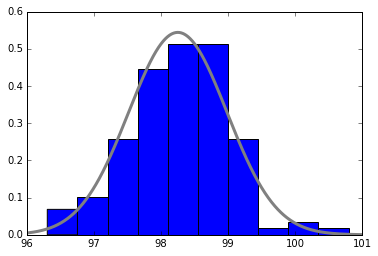

In [3]:
x= np.linspace(96, 101, 1000)
dist= stats.norm(df.temperature.mean(), df.temperature.std())
pdf= dist.pdf(x)
plt.hist(df.temperature, normed=True)
plt.plot(x, pdf, color='gray', lw=3)

In [4]:
stats.ks_2samp(df.temperature, dist.rvs(130))

Ks_2sampResult(statistic=0.099999999999999978, pvalue=0.51262304089134769)

Given that the p-value= 51% we accept the null hypothesis that the distributions are the same; that is, the distribution of human temperatures can be fitted as a normal distribution.


## 2. Is the true population mean really 98.6 F?
I will make a test hypothesis to see whether this is the true estimate of temperatures.

### $H_0$: the true population mean is 98.6 F -> $\mu_{\bar{x}}= 98.6$ F.
### $H_1$: the true population mean is not 98.6 F

I will assess the null hypothesis with a significance level of 1%

These are the observed values:

In [5]:
mean_obs, std_obs= df.temperature.mean(), df.temperature.std()
mean_obs, std_obs

(98.24923076923078, 0.7331831580389454)

This is the size of the sample:

In [6]:
sample_size= df.temperature.count()
sample_size

130

Since this value is higher than 30, the sampling distribution of sampled means is well fitted by a normal distribution.

In [7]:
mean_sampl_dist, std_error= 98.6, std_obs/np.sqrt(sample_size)
mean_sampl_dist, std_error 

(98.6, 0.06430441683789101)

To test the hypothesis, we need to know the distance of the observed mean to the mean of the sampling distribution. This distance can be calculated with the z-value.

** The z-value  of the observed mean is: **

In [8]:
z_value= (mean_obs-mean_sampl_dist)/std_error
z_value

-5.4548232923640789

Things to be aware of: <br>
- I will assess the null hypothesis with a significance level of 1%.
- Given my alternative hypothesis, I will use a two-tail test => $Z_\mathrm{crit}$ is equal to the CDF of a standard normal curve when it reaches 99.5%. <br>

Using a z-table I find that:

In [9]:
Z_crit= 2.57

### Since |$Z_\mathrm{value}$| > $Z_\mathrm{crit}$, we reject $H_0$, which means that the true population mean temperature IS NOT 98.6 F.

** What happens if I apply a t-statistics? **

The t-value will be:

In [10]:
t_value= (mean_obs-mean_sampl_dist)/std_error
t_value

-5.4548232923640789

By using a significance level of 1% and a two-tailed distribution, the value  $t_\mathrm{crit}$ is equal to:

In [11]:
t_crit= 2.62

### Since |$t_\mathrm{value}$| > $t_\mathrm{crit}$, we reject $H_0$.
### In conclusion, the z-test and the t-test give the same result, as expected. 

## 3.  At what temperature should we consider someone's temperature to be "abnormal"?

The abnormal temperatures will the temperatures that are outside the 95% confidence interval.

The mean and std of the sampling distribution are:

In [12]:
mean_ci, std_error_ci= mean_obs, std_obs/np.sqrt(sample_size)
mean_ci, std_error_ci

(98.24923076923078, 0.06430441683789101)

The 95% confidence interval of this distribution will be:

In [13]:
CI= 1.96*std_error_ci
CI

0.12603665700226638

The estimation of the mean is then:

In [14]:
mean_estimate= (mean_obs-CI, mean_obs+CI)
mean_estimate

(98.123194112228518, 98.375267426233037)

### The temperatures below 98.1 F and above 98.3 F are abnormal.

## 4.  Is there a significant difference between males and females in normal temperature?

In [15]:
females= df[df.gender== 'F']
mean_females_temp= females.temperature.mean()
mean_females_temp

98.39384615384613

In [16]:
males= df[df.gender== 'M']
mean_males_temp= males.temperature.mean()
mean_males_temp

98.1046153846154

In [17]:
diff_mean= mean_females_temp- mean_males_temp
diff_mean

0.289230769230727

##### Hypothesis test:

$H_0$: The distributions are the same => $\mu_1-\mu2=0$ <br>
$H_1$: The distributions are different => $\mu_1-\mu2 \neq 0$

I will test the null hypothesis with a significance level of 1%.

***Analytical approach: ***

In [18]:
std_f, std_m = females.temperature.std(), males.temperature.std()
n= females.temperature.count()
std_sd= np.sqrt( (std_f**2 + std_m**2)/n )
z_val= diff_mean/std_sd
z_val

2.2854345381652741

The significance level used is 1%. I will use a two-tail test. Therefore,  $Z_\mathrm{crit}$ is equal to the CDF of a standard normal curve when it reaches 99.5%

In [19]:
Z_crit= 2.57

### Since $Z_\mathrm{value}$ < $Z_\mathrm{crit}$, I accept $H_0$. This means that there is not an apparent difference between males and females temperatures.

*** Numerical approach ***

In [20]:
class Hypothesis_testing(object):
    
    def distance(self, dist1, dist2):
        diff= dist1.mean() - dist2.mean() 
        return diff
    
    def resample_with_model(self, n, pool):
        '''
        uses permutation to create samples from Ho
        '''
        np.random.shuffle(pool)
        return self.distance(pool[:n], pool[n:])
    
    def test_hypothesis(self, dist1, dist2, niters=1000):
        n, m = len(dist1), len(dist2)
        pool= np.hstack((dist1, dist2))
        sampling_dist= np.array([self.resample_with_model(n, pool) for i in range(niters)] )
        observed_d= self.distance(dist1, dist2)
        if (observed_d >= 0):
            p_value= sum(sampling_dist>= observed_d)/len(sampling_dist)
        if (observed_d <0):
            p_value= sum(sampling_dist<= observed_d)/len(sampling_dist)
        #plt.hist(sampling_dist)
        #plt.plot(observed_d*np.ones(300), np.arange(300), color='gray')
        return p_value

In [21]:
stats= Hypothesis_testing()
stats.test_hypothesis(females.temperature, males.temperature)

0.0089999999999999993

*** Since p-value >1% I accept $H_0$ which means that the distributions are the same => the observed effect is due to chance. ***